# ThreeProng Strategy Simulation

In [1]:
import sys
import os

# Get the current working directory
cwd = os.getcwd()

# Get the parent directory of the current working directory
parent_dir = os.path.abspath(os.path.join(cwd, os.pardir))

# Add the parent directory to the search path
sys.path.append(parent_dir)

In [2]:
from analysis.simulation import Simulation
from core import SimulatedMarket, GeminiMarket
from strategies import ThreeProngAlt
from analysis.plot import Plotter

## Setup Simulation

In [3]:
from yaml import safe_load
from misc import ROOT

with open(f'{ROOT}/gemini_api.yml', 'r') as f:
    secrets = safe_load(f)

# symbol = "solusd"
symbol = "dogeusd"
# symbol = "ethusd"
# symbol = "btcusd"

mark = GeminiMarket(symbol, secrets['key'], secrets['secret'], auto_update=False)
sim = SimulatedMarket(mark)

Beginning update
Loading data for Gemini
Load complete for Gemini
Fetching candle data for 1m...
Fetching candle data for 5m...
Fetching candle data for 15m...
Fetching candle data for 30m...
Fetching candle data for 1hr...
Fetching candle data for 6hr...
Fetching candle data for 1day...
Beginning save for Gemini
Finished saving Gemini
Update complete for Gemini


## Simulate Strategy

In [4]:
strat = ThreeProngAlt(market=sim, timeout='2h', freq='1m', lookback=2)
strat.build_order_handler(threshold=0.55, capital=1000)

test = Simulation(strat)
test.process_timeframes()

Starting simulation
Pre-processing data
Beginning to process decision data
10 completed
20 completed
30 completed


/Users/swe/repos/investr/strategies/OrderHandler.py:206: UserWarning: `starting` accessed while buying is restricted (`_remaining` == 0)
  warn(msg)


40 completed


/Users/swe/repos/investr/strategies/OrderHandler.py:206: UserWarning: `starting` accessed while buying is restricted (`_remaining` == 0)
  warn(msg)


50 completed


/Users/swe/repos/investr/strategies/OrderHandler.py:206: UserWarning: `starting` accessed while buying is restricted (`_remaining` == 0)
  warn(msg)


60 completed


/Users/swe/repos/investr/strategies/OrderHandler.py:206: UserWarning: `starting` accessed while buying is restricted (`_remaining` == 0)
  warn(msg)


70 completed
80 completed
90 completed
Finished processing data


In [5]:
test.strategy.order_handler.pnl()

765.0801010724043

### Plot

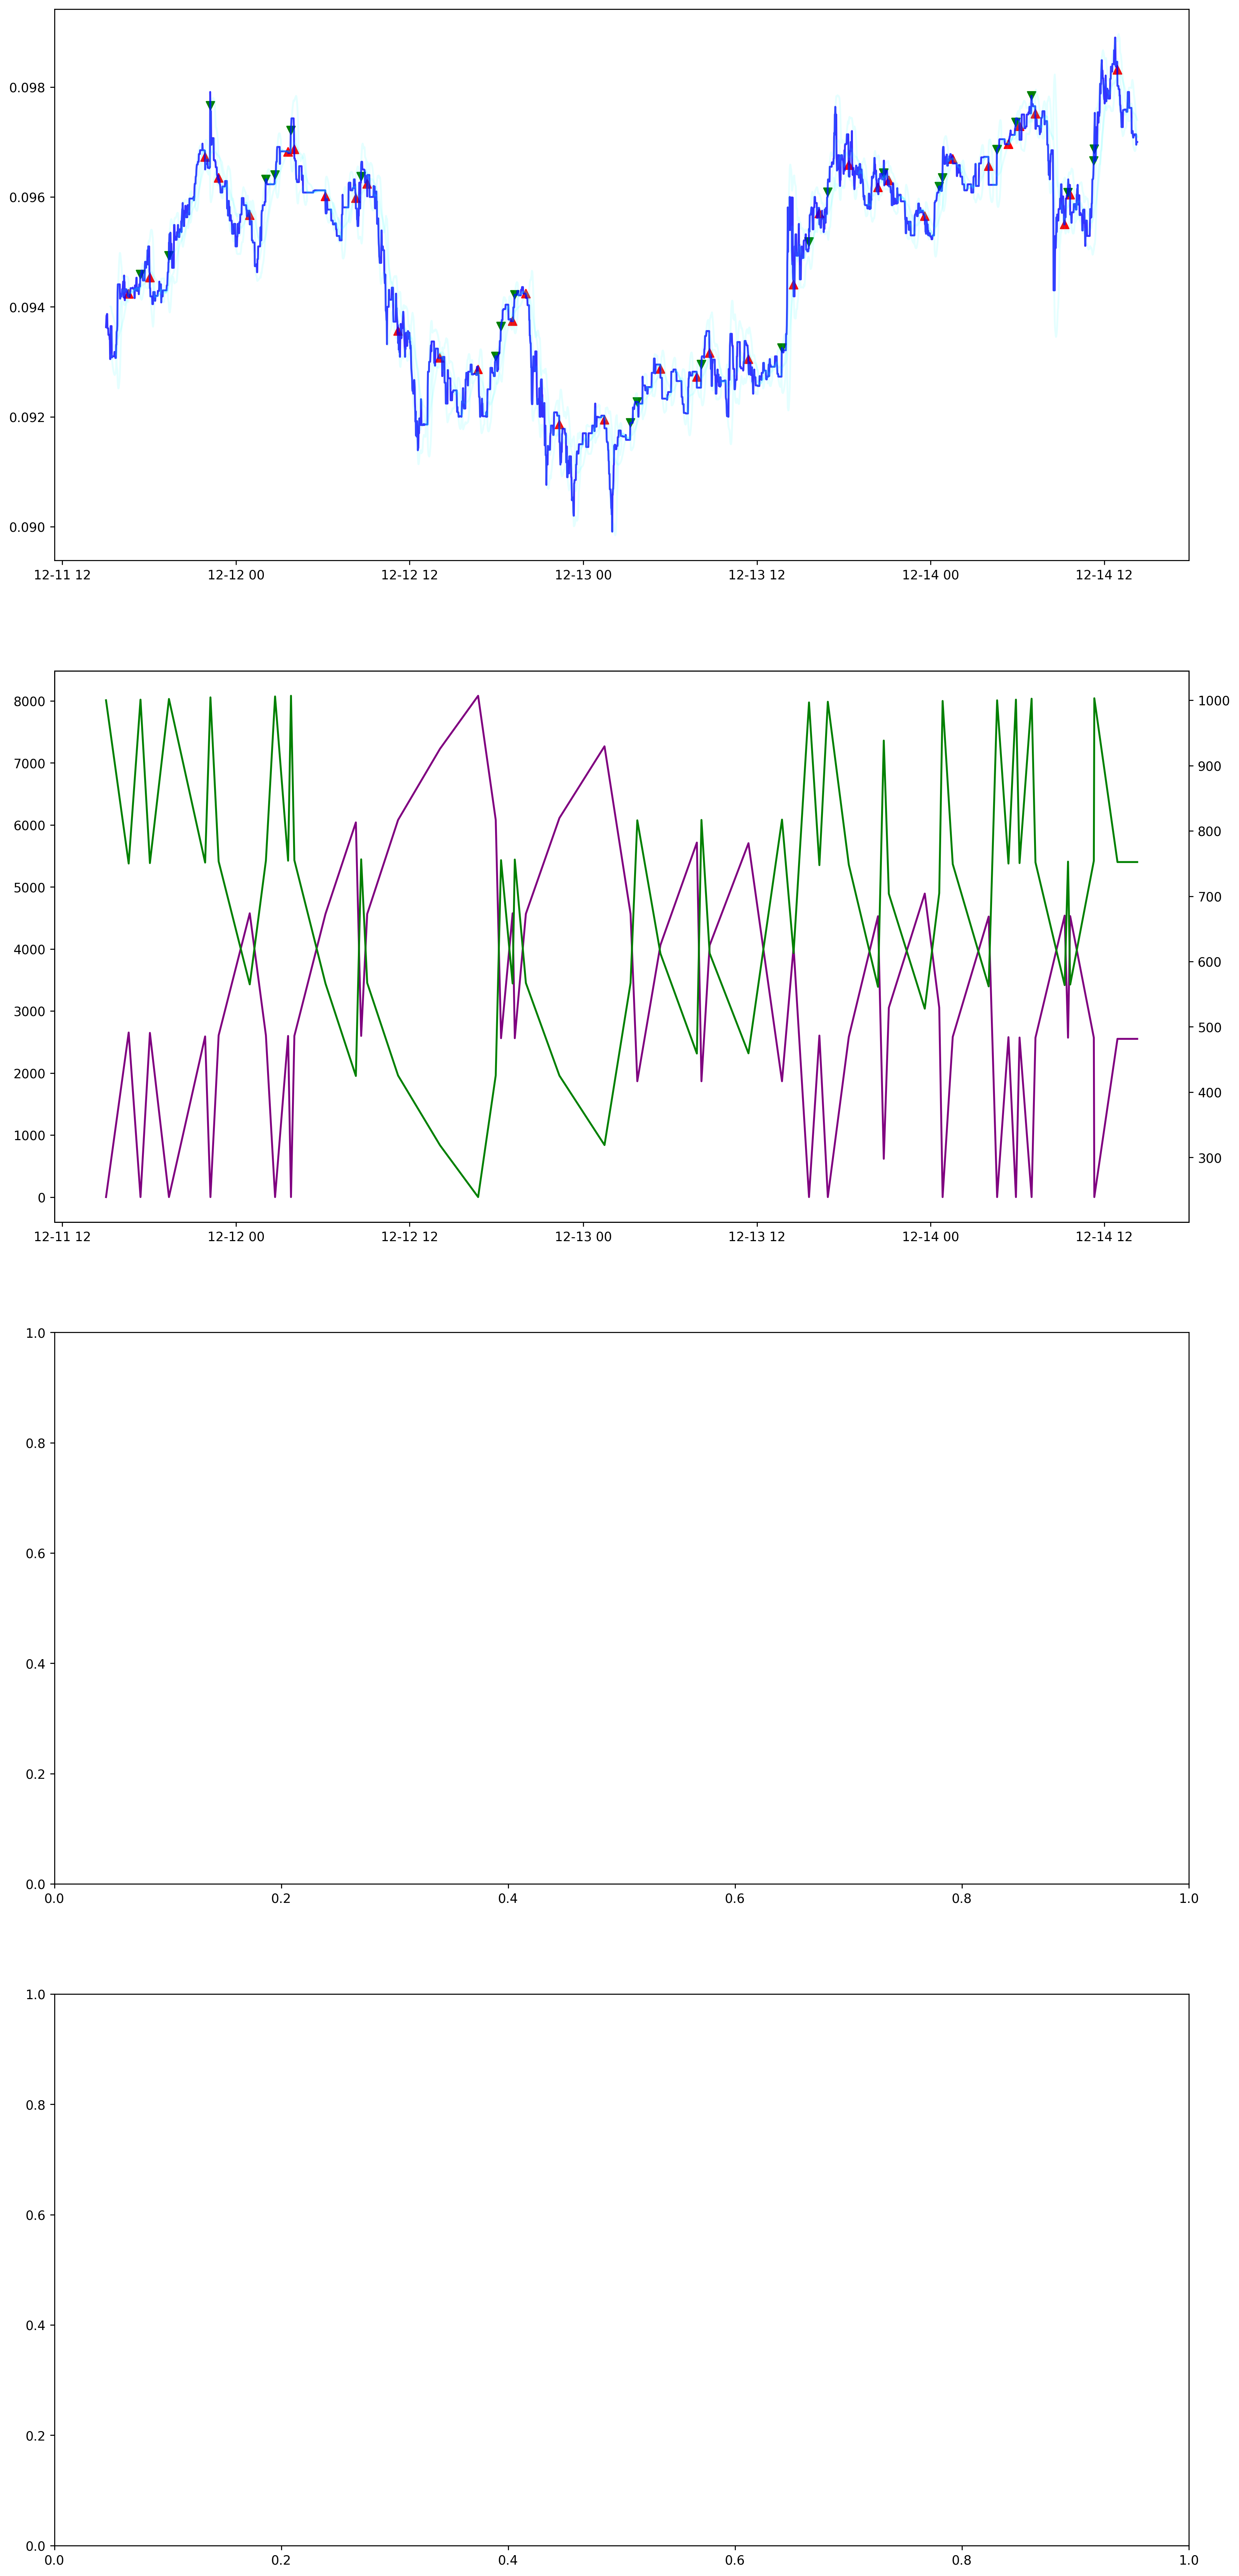

In [6]:
Plotter(strat).plot()

In [7]:
strat.unpaired

AttributeError: 'ThreeProngAlt' object has no attribute 'unpaired'